In [1]:
%matplotlib notebook
%pylab
#%run file.ipynb #calling functions
from cg_functions import *

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [3]:
%load_ext autoreload 
%autoreload 2 

ModuleNotFoundError: No module named 'autoreload '

In [2]:
# user defined parameters
u = 2   # velocity
Tf = 0.025  # final time
ax = -1; bx = 1
sigma = 1/8
#qinit = lambda x: np.exp(-(x/(2*sigma))**2)
qinit = lambda x : sin(2*pi*x)

# function f(q(x,t)) = u*q(x,t)

fe = lambda q: u*q
a = 0.1

N = 1, time_step(M = 5)
N = 1, time_step(M = 10)
N = 1, time_step(M = 20)
N = 1, time_step(M = 40)


<IPython.core.display.Javascript object>


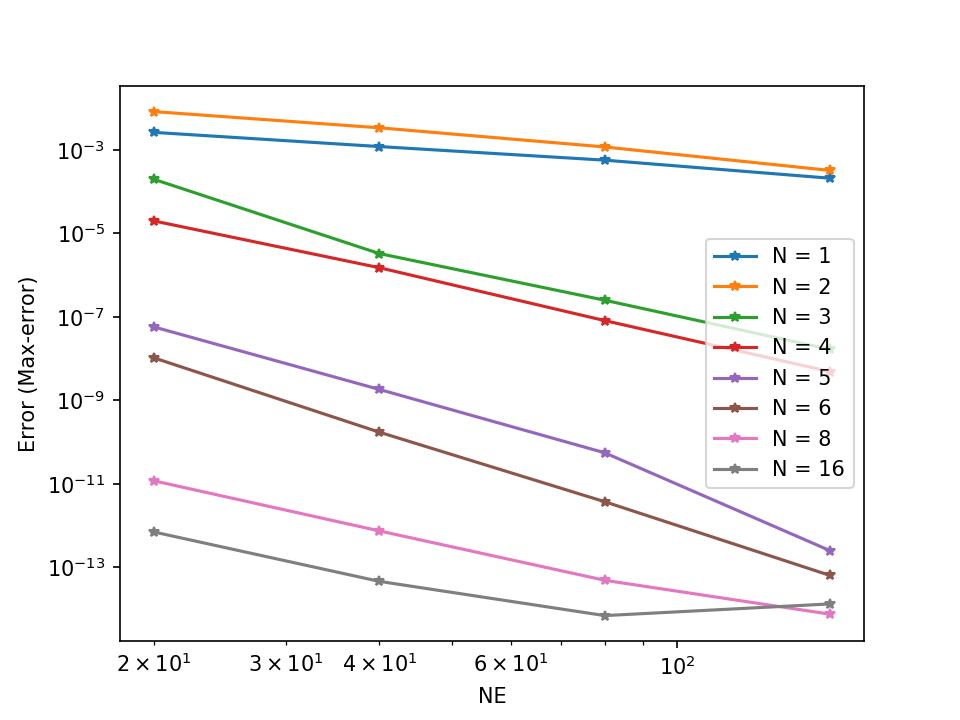

<IPython.core.display.Javascript object>


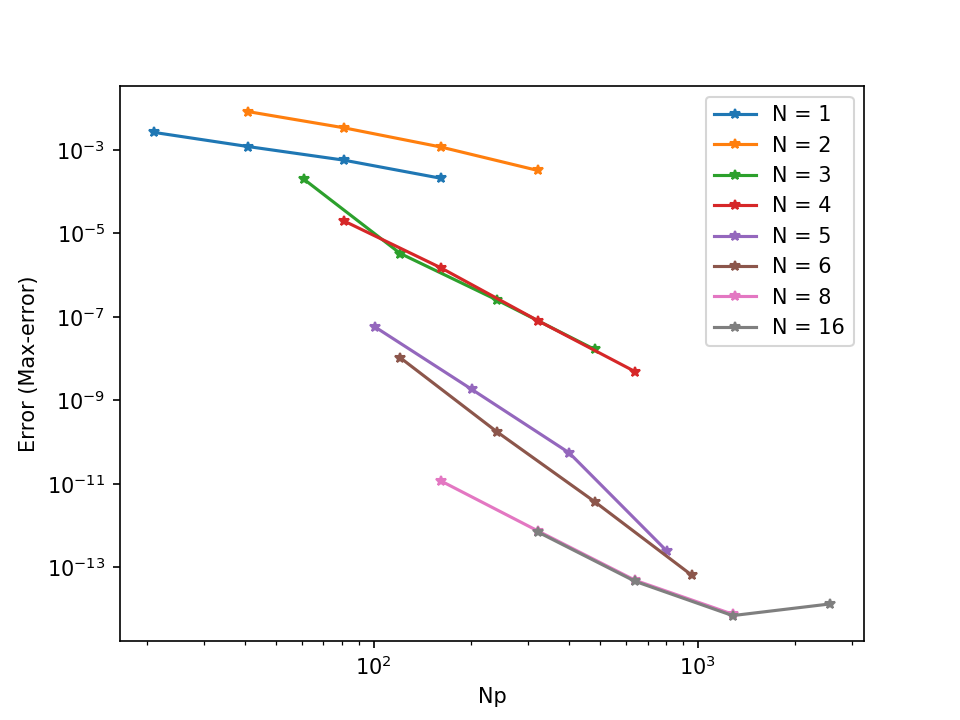

N = 2, time_step(M = 10)
N = 2, time_step(M = 20)
N = 2, time_step(M = 40)
N = 2, time_step(M = 80)
N = 3, time_step(M = 15)
N = 3, time_step(M = 30)
N = 3, time_step(M = 60)
N = 3, time_step(M = 120)
N = 4, time_step(M = 20)
N = 4, time_step(M = 40)
N = 4, time_step(M = 80)
N = 4, time_step(M = 160)
N = 5, time_step(M = 26)
N = 5, time_step(M = 52)
N = 5, time_step(M = 104)
N = 5, time_step(M = 208)
N = 6, time_step(M = 30)
N = 6, time_step(M = 60)
N = 6, time_step(M = 120)
N = 6, time_step(M = 240)
N = 8, time_step(M = 40)
N = 8, time_step(M = 80)
N = 8, time_step(M = 160)
N = 8, time_step(M = 320)
N = 16, time_step(M = 80)
N = 16, time_step(M = 160)
N = 16, time_step(M = 320)
N = 16, time_step(M = 640)


In [3]:
# Order of polynomials

Order = [1,2,3,4,5, 6, 8,16]
P = []
for N in Order: 
    
    Q = N+1
    
    # list of the number of elements
    NE = array([20,40,80,160])
    l = len(NE)

    # array that contains the error for each iteration
    Error = zeros(l)

    for ne in range(l):

        Ne = NE[ne]
        Np = N*Ne+1

        # space stuff
        #x = np.linspace(-1, 1, Np)

        x = zeros(Np)
        xel = linspace(-1,1,Ne+1)
        xe2 = array(Lobatto_p(N))
        xe = xe2[::-1]
        for e in range(1,Ne+1):
            ae=xel[e-1] ; be=xel[e]

            xsi=((be-ae)/2)*(xe-1) + be
            #print('a=',a)
            #print('b=',b)
            #print('xsi=',xsi)
            for i in range(0,N+1):
                ip=intma(e,N)[i]
                #print('ip=',ip)
                x[ip]=xsi[i]
        #x = np.linspace(-1, 1, Np)

        dx = (bx-ax)/(Np-1)   # for second order

        #time stuff

        fixed_dt= True
        if (fixed_dt):
            dx0 = (bx-ax)/(NE[0]*N)
            dtest = a*dx0/np.abs(u)
            M0 = int(Tf//dtest)+1    # Number of time steps
            dt0 = Tf/M0

            f = log2(dx0/dx)
            dt = dt0/2**f
            M = int(M0*2**f)
            print('N = {:d}, time_step(M = {:d})'.format(N,M))
        else:        
            dtest = a*dx/np.abs(u)
            M = Tf//dtest+1    # Number of time steps
            M0 = int(M)
            dt = Tf/M

        t = linspace(0, Tf, M+1)


        # approximate solution of the wave equation
        q = Solver_1DW(N,Ne,M,x,t,dt)

        # exact solution
        q_exact = qinit(x-u*t[M])
        #error
        error = abs(q-q_exact)
        Error[ne] = max(error)
        #error = sqrt(sum((q-q_exact)**2)/sum(q_exact**2))
        #Error[ne] = error
        #plot of the computed and exact solutions

        #figure(ne)
        #plot(x, q, label = 'Computed: Ne = {}'.format(Ne))
        #plot(x, q_exact, '--', label = 'Exact: N = {}, Ne = {}'.format(N,Ne))

        #xlabel('NE')
        #ylabel('q')
        #legend()
        #grid() 
    figure(1)
    loglog(NE, Error,'-*',markersize=5, label = 'N = {}'.format(N))
    xlabel('NE')
    ylabel('Error (Max-error)')
    legend()
    show()

    figure(2)
    Np = NE*N+1
    loglog(Np, Error,'-*',markersize=5, label = 'N = {}'.format(N))
    xlabel('Np')
    ylabel('Error (Max-error)')
    legend()
    show()
    
    p = polyfit(log(NE), log(Error),1)
    #print('N = {:d}, rate = {:f}'.format(N,p[0]))
    P.append(p[0])

In [4]:
for i in range(len(Order)):
    print('N = {:d}, rate = {:f}'.format(Order[i],P[i]))

N = 1, rate = -1.202800
N = 2, rate = -1.557135
N = 3, rate = -4.433545
N = 4, rate = -4.018341
N = 5, rate = -5.846100
N = 6, rate = -5.748688
N = 8, rate = -3.577567
N = 16, rate = -1.989912
